In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# 提取数据
data = df(load_breast_cancer().data, columns=load_breast_cancer().feature_names)
data['target'] = load_breast_cancer().target
x_train, x_test, y_train, y_teest = train_test_split(data.iloc[:,:-1], 
                                                        data['target'], 
                                                        test_size=0.2,
                                                        random_state=1)

In [3]:
# 建模
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1, max_depth=4) # 深度设置为4，默认按照gini进行分裂
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [4]:
###### 1、feature_importances_（适用于决策树、随机森林、GBDT、xgboost、lightgbm）
# 重要性
features_import = df(x_train.columns, columns=['feature'])
features_import['importance'] = model.feature_importances_  # 默认按照gini计算特征重要性
features_import.sort_values('importance', inplace=True)

In [5]:
features_import

,feature,importance
0,mean radius,0.000000
26,worst concavity,0.000000
25,worst compactness,0.000000
23,worst area,0.000000
19,fractal dimension error,0.000000
18,symmetry error,0.000000
17,concave points error,0.000000
16,concavity error,0.000000
28,worst symmetry,0.000000
12,perimeter error,0.000000


0.0 mean radius
0.0 worst concavity
0.0 worst compactness
0.0 worst area
0.0 fractal dimension error
0.0 symmetry error
0.0 concave points error
0.0 concavity error
0.0 worst symmetry
0.0 perimeter error
0.0 texture error
0.0 smoothness error
0.0 mean fractal dimension
0.0 mean texture
0.0 mean perimeter
0.0 mean area
0.0 radius error
0.0 mean compactness
0.0 worst fractal dimension
0.0 mean symmetry
0.0 mean concavity
0.003112891056853882 area error
0.007875242315148159 mean smoothness
0.009386003085809218 worst smoothness
0.026941618446559488 worst radius
0.02902608791559225 mean concave points
0.04200129234745685 compactness error
0.04432084787923648 worst concave points
0.10345091635870725 worst texture
0.7338851005946364 worst perimeter


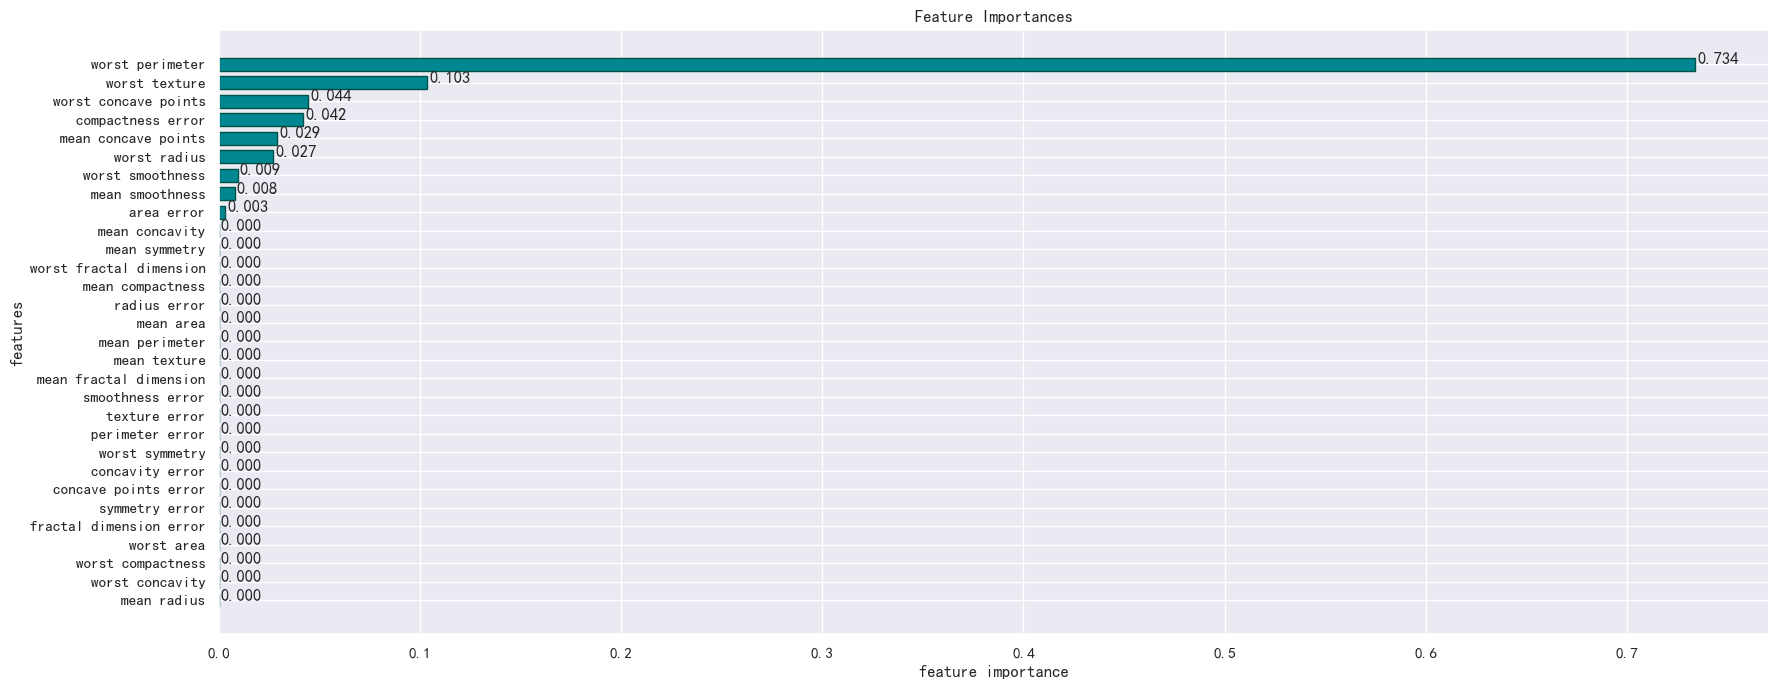

"\n    plt.bar()：正常柱状图；\n    plt.barh()：横向的柱状图;\nArgs:(plt.bar)    \n    x：x坐标\n    height：高度\n    width=0.8：宽度，取值在0~1之间；\n    bottom：柱状图的起始位置，也就是y轴的起始坐标\n    align='center'：柱状图的中心位置，'edge'边缘\n    color：柱状图颜色\n    edgecolor：边框颜色\n    linewidth：边框宽度\n    tick_label：下标标签\n    log：柱状图y周使用科学计算方法，bool类型\n    orientation：柱状图是竖直还是水平，竖直：“vertical”，水平条：“horizontal”\n"

In [6]:
# 绘图
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(20, 8), dpi=100) 
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文黑体
plt.rcParams['axes.unicode_minus'] = False # 负值显示

plt.barh(features_import['feature'], features_import['importance'], height=0.7, color='#008792', edgecolor='#005344') # 更多颜色可参见颜色大全
plt.xlabel('feature importance') # x 轴
plt.ylabel('features') # y轴
plt.title('Feature Importances') # 标题

for a,b in zip( features_import['importance'],features_import['feature']): # 添加数字标签
   print(a,b)
   plt.text(a+0.001, b,'%.3f'%float(a)) # a+0.001代表标签位置在柱形图上方0.001处
plt.show()


'''
    plt.bar()：正常柱状图；
    plt.barh()：横向的柱状图;
Args:(plt.bar)    
    x：x坐标
    height：高度
    width=0.8：宽度，取值在0~1之间；
    bottom：柱状图的起始位置，也就是y轴的起始坐标
    align='center'：柱状图的中心位置，'edge'边缘
    color：柱状图颜色
    edgecolor：边框颜色
    linewidth：边框宽度
    tick_label：下标标签
    log：柱状图y周使用科学计算方法，bool类型
    orientation：柱状图是竖直还是水平，竖直：“vertical”，水平条：“horizontal”
'''
